In [1]:
import pandas as pd
import numpy as np
import os
import math

In [2]:
os.chdir('C:/Users/athorat/OneDrive - Nice Systems Ltd/00_Amit Thorat Data/ISB - AMPBA/01_Project/Term6_MCA/Assignment/Assignment#2/Assignment 2')
mugsData = pd.read_excel('mugs-preference-parameters-full.xlsx')
demoGrapData = pd.read_excel('demographics-full.xlsx')

In [3]:
mugsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cust    311 non-null    int64
 1    pPr30  311 non-null    int64
 2    pPr10  311 non-null    int64
 3    pPr05  311 non-null    int64
 4   pIn0.5  311 non-null    int64
 5   pIn1    311 non-null    int64
 6   pIn3    311 non-null    int64
 7    pCp12  311 non-null    int64
 8    pCp20  311 non-null    int64
 9    pCp32  311 non-null    int64
 10   pClD   311 non-null    int64
 11   pClF   311 non-null    int64
 12   pClE   311 non-null    int64
 13  pCnSl   311 non-null    int64
 14  pCnSp   311 non-null    int64
 15  pCnLk   311 non-null    int64
 16   pBrA   311 non-null    int64
 17   pBrB   311 non-null    int64
 18   pBrC   311 non-null    int64
 19   IPr    311 non-null    int64
 20  Iin     311 non-null    int64
 21   ICp    311 non-null    int64
 22   ICl    311 non-null    int64
 23  Icn     311 non

In [4]:
demoGrapData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id        311 non-null    int64
 1   income    311 non-null    int64
 2   age       311 non-null    int64
 3   sports    311 non-null    int64
 4   gradschl  311 non-null    int64
dtypes: int64(5)
memory usage: 12.3 KB


In [5]:
# Define the desired column names
new_column_names = [
    'Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 
    'pCp12', 'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 
    'pCnSl', 'pCnSp', 'pCnLk', 'pBrA', 'pBrB', 'pBrC', 
    'IPr', 'Iin', 'ICp', 'ICl', 'ICn', 'IBr'
]

# Rename the columns
mugsData.columns = new_column_names

In [6]:
# Define the columns for multiplication
ipr_old_columns = ['pPr30', 'pPr10', 'pPr05']
iin_old_columns = ['pIn0.5', 'pIn1', 'pIn3']
icp_old_columns = ['pCp12', 'pCp20', 'pCp32']
icl_old_columns = ['pClD', 'pClF', 'pClE']
icn_old_columns = ['pCnSl', 'pCnSp', 'pCnLk']
ibr_old_columns = ['pBrA', 'pBrB', 'pBrC']

In [7]:
# Define the new column names for multiplication
ipr_columns = ['I*pPr30', 'I*pPr10', 'I*pPr05']
iin_columns = ['I*pIn0.5', 'I*pIn1', 'I*pIn3']
icp_columns = ['I*pCp12', 'I*pCp20', 'I*pCp32']
icl_columns = ['I*pClD', 'I*pClF', 'I*pClE']
icn_columns = ['I*pCnSl', 'I*pCnSp', 'I*pCnLk']
ibr_columns = ['I*pBrA', 'I*pBrB', 'I*pBrC']

In [8]:
mugsData[ipr_columns] = mugsData['IPr'].values.reshape(-1, 1) * mugsData[ipr_old_columns]
mugsData[iin_columns] = mugsData['Iin'].values.reshape(-1, 1) * mugsData[iin_old_columns]
mugsData[icp_columns] = mugsData['ICp'].values.reshape(-1, 1) * mugsData[icp_old_columns]
mugsData[icl_columns] = mugsData['ICl'].values.reshape(-1, 1) * mugsData[icl_old_columns]
mugsData[icn_columns] = mugsData['ICn'].values.reshape(-1, 1) * mugsData[icn_old_columns]
mugsData[ibr_columns] = mugsData['IBr'].values.reshape(-1, 1) * mugsData[ibr_old_columns]

In [9]:
print(mugsData)

     Cust  pPr30  pPr10  pPr05  pIn0.5  pIn1  pIn3  pCp12  pCp20  pCp32  ...  \
0       1      1      3      7       1     3     7      1      7      6  ...   
1       2      1      6      7       1     4     7      1      7      6  ...   
2       3      1      6      7       1     4     7      7      4      1  ...   
3       4      1      6      7       1     4     7      7      1      3  ...   
4       5      1      4      7       1     4     7      1      7      2  ...   
..    ...    ...    ...    ...     ...   ...   ...    ...    ...    ...  ...   
306   307      1      3      7       1     6     7      1      7      6  ...   
307   308      1      3      7       1     6     7      1      7      6  ...   
308   309      1      6      7       1     5     7      1      7      3  ...   
309   310      1      3      7       1     5     7      1      7      1  ...   
310   311      1      3      7       1     5     7      1      7      2  ...   

     I*pCp32  I*pClD  I*pClF  I*pClE  I

In [10]:
# Save the modified DataFrame to a new CSV file or update the existing one
mugsData.to_csv('mugsData.csv', index=False)

In [11]:
# Merge dataframes based on 'Cust' in df1 and 'id' in df2
mugsDataMergedDF = pd.merge(mugsData, demoGrapData, left_on='Cust', right_on='id', how='outer')

In [12]:
# Drop the 'id' column from the merged dataframe
mugsDataMergedDF.drop('id', axis=1, inplace=True)

In [13]:
mugsDataMergedDF.head(10)

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl
0,1,1,3,7,1,3,7,1,7,6,...,34,170,238,98,70,14,63,46,0,0
1,2,1,6,7,1,4,7,1,7,6,...,51,357,357,105,75,15,65,48,0,0
2,3,1,6,7,1,4,7,7,4,1,...,16,80,112,9,27,63,38,37,0,0
3,4,1,6,7,1,4,7,7,1,3,...,20,100,140,112,16,80,77,58,1,1
4,5,1,4,7,1,4,7,1,7,2,...,0,0,0,33,11,77,44,41,0,0
5,6,1,5,7,1,4,7,1,7,7,...,13,78,91,45,15,105,79,60,1,1
6,7,1,7,7,1,6,7,1,7,7,...,19,38,133,36,84,12,40,37,0,0
7,8,1,6,7,1,2,7,1,7,2,...,8,24,56,50,70,10,43,39,0,0
8,9,1,5,7,1,3,7,1,5,7,...,31,186,217,91,52,13,59,44,0,0
9,10,1,7,7,1,3,7,6,7,1,...,15,60,105,45,105,15,46,41,0,0


In [14]:
# Save the modified DataFrame to a new CSV file or update the existing one
mugsDataMergedDF.to_csv('mugsDataMergedDF.csv', index=False)

## Part (A) Product affinity based segmentation

In [15]:
# Define the incumbents' attributes
incumbent_attributes = [('$30', '3 hrs', '20 oz', 'Clean Easy', 'Leak resistant', 'Brand A'),
                        ('$10', '1 hrs', '20 oz', 'Clean Fair', 'Spill resistant', 'Brand B'),
                        ('$30', '1 hrs', '20 oz', 'Clean Easy', 'Leak resistant', 'Brand C')]

In [16]:
# Define the attribute levels
price_levels = ['$30', '$10', '$5']
time_insulated_levels = ['0.5 hrs', '1 hrs', '3 hrs']
capacity_levels = ['12 oz', '20 oz', '32 oz']
cleanability_levels = ['Clean Difficult', 'Clean Fair', 'Clean Easy']
containment_levels = ['Slosh resistant', 'Spill resistant', 'Leak resistant']
brand_levels = ['Brand A', 'Brand B', 'Brand C']

In [17]:
# Create a dictionary to map levels to index values
level_to_index = {
    'Price': {level: index + 1 for index, level in enumerate(price_levels)},
    'Time_Insulated': {level: index + 1 for index, level in enumerate(time_insulated_levels)},
    'Capacity': {level: index + 1 for index, level in enumerate(capacity_levels)},
    'Cleanability': {level: index + 1 for index, level in enumerate(cleanability_levels)},
    'Containment': {level: index + 1 for index, level in enumerate(containment_levels)},
    'Brand': {level: index + 1 for index, level in enumerate(brand_levels)}
}

In [18]:
# Create a DataFrame with zeros and update values based on the attribute levels
df = pd.DataFrame(0, index=level_to_index.keys(), columns=brand_levels)

In [19]:
# Update the values in the DataFrame based on the incumbents' attributes
for attr in incumbent_attributes:
    price, time_insulated, capacity, cleanability, containment, brand = attr
    df.at['Price', brand] = level_to_index['Price'][price]
    df.at['Time_Insulated', brand] = level_to_index['Time_Insulated'][time_insulated]
    df.at['Capacity', brand] = level_to_index['Capacity'][capacity]
    df.at['Cleanability', brand] = level_to_index['Cleanability'][cleanability]
    df.at['Containment', brand] = level_to_index['Containment'][containment]
    df.at['Brand', brand] = level_to_index['Brand'][brand]

In [20]:
# Print the resulting DataFrame
print(df)

                Brand A  Brand B  Brand C
Price                 1        2        1
Time_Insulated        3        2        2
Capacity              2        2        2
Cleanability          3        2        3
Containment           3        2        3
Brand                 1        2        3


In [21]:
# Extract the levels columns from the DataFrame
levels_columns = ['Price', 'Time_Insulated', 'Capacity', 'Cleanability', 'Containment', 'Brand']

In [22]:
# Create a new DataFrame for the levels matrix
levels_matrix = pd.DataFrame(columns=['Levels'] + list(df.columns))

In [23]:
# Populate the levels matrix with 3 levels
for i, column in enumerate(levels_columns):
    for j in range(1, 4):  # Assuming there are 3 levels for each attribute
        levels_matrix = levels_matrix.append({
            'Levels': f'd{column}{j}',
            **{product: 1 if df.at[column, product] == j else 0 for product in df.columns}
        }, ignore_index=True)

C:\Users\athorat\AppData\Local\Temp\ipykernel_198416\1629549863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  levels_matrix = levels_matrix.append({
C:\Users\athorat\AppData\Local\Temp\ipykernel_198416\1629549863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  levels_matrix = levels_matrix.append({
C:\Users\athorat\AppData\Local\Temp\ipykernel_198416\1629549863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  levels_matrix = levels_matrix.append({
C:\Users\athorat\AppData\Local\Temp\ipykernel_198416\1629549863.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  levels_matrix = levels_matrix.append({
C:\Users\athorat\AppData

In [24]:
# Print the resulting levels matrix
print(levels_matrix)

              Levels Brand A Brand B Brand C
0            dPrice1       1       0       1
1            dPrice2       0       1       0
2            dPrice3       0       0       0
3   dTime_Insulated1       0       0       0
4   dTime_Insulated2       0       1       1
5   dTime_Insulated3       1       0       0
6         dCapacity1       0       0       0
7         dCapacity2       1       1       1
8         dCapacity3       0       0       0
9     dCleanability1       0       0       0
10    dCleanability2       0       1       0
11    dCleanability3       1       0       1
12     dContainment1       0       0       0
13     dContainment2       0       1       0
14     dContainment3       1       0       1
15           dBrand1       1       0       0
16           dBrand2       0       1       0
17           dBrand3       0       0       1


In [25]:
selectedColumnsNew=["I*pPr30","I*pPr10","I*pPr05","I*pIn0.5","I*pIn1","I*pIn3","I*pCp12","I*pCp20","I*pCp32","I*pClD","I*pClF","I*pClE","I*pCnSl","I*pCnSp","I*pCnLk","I*pBrA","I*pBrB","I*pBrC"]

In [26]:
newMugsData = mugsData[selectedColumnsNew]

In [27]:
# Select the columns excluding the 'Levels' column
matrix_levels_matrix = levels_matrix.iloc[:, 1:]

In [28]:
# Convert the DataFrame to a matrix
levelMatrixRep = matrix_levels_matrix.values

In [29]:
print(levelMatrixRep)

[[1 0 1]
 [0 1 0]
 [0 0 0]
 [0 0 0]
 [0 1 1]
 [1 0 0]
 [0 0 0]
 [1 1 1]
 [0 0 0]
 [0 0 0]
 [0 1 0]
 [1 0 1]
 [0 0 0]
 [0 1 0]
 [1 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]


In [30]:
# Convert the DataFrame to a matrix
newMugsDataMatrixRep = newMugsData.values

In [31]:
print(newMugsDataMatrixRep)

[[  5  15  35 ...  98  70  14]
 [  6  36  42 ... 105  75  15]
 [ 55 330 385 ...   9  27  63]
 ...
 [ 12  72  84 ...  77  33  11]
 [ 57 171 399 ...  10  50  70]
 [ 20  60 140 ...  80  16 112]]


In [32]:
# Perform matrix multiplication
resultMatrix = np.dot(newMugsDataMatrixRep,levelMatrixRep)

In [33]:
print(resultMatrix)

[[670 517 554]
 [678 659 579]
 [287 501 326]
 [610 427 551]
 [327 419 353]
 [586 390 628]
 [418 565 382]
 [489 552 384]
 [582 495 440]
 [400 595 330]
 [505 397 527]
 [689 546 558]
 [349 560 375]
 [487 420 393]
 [312 407 370]
 [343 443 387]
 [557 490 578]
 [592 606 469]
 [585 394 456]
 [355 589 403]
 [403 539 299]
 [396 576 370]
 [507 421 467]
 [343 562 310]
 [367 452 341]
 [578 561 536]
 [521 439 479]
 [351 404 369]
 [395 571 327]
 [318 429 345]
 [641 496 509]
 [599 258 547]
 [352 582 442]
 [366 384 348]
 [292 450 370]
 [646 571 586]
 [395 561 388]
 [439 539 457]
 [394 528 388]
 [650 459 424]
 [622 505 436]
 [669 545 617]
 [355 578 325]
 [260 414 348]
 [663 505 543]
 [552 442 490]
 [340 433 292]
 [641 532 578]
 [413 406 341]
 [538 511 475]
 [346 570 372]
 [296 440 333]
 [510 382 408]
 [358 591 411]
 [560 338 470]
 [601 443 665]
 [474 565 496]
 [393 529 397]
 [627 411 540]
 [466 591 518]
 [394 464 301]
 [442 605 465]
 [609 398 360]
 [315 500 344]
 [580 406 580]
 [268 335 313]
 [352 506 

In [34]:
# Define the scaling constant
c = 0.0139

In [35]:
# Create a function to apply np.exp element-wise to the matrix
exp_func = np.vectorize(np.exp)

In [36]:
# Multiply each element of the result_matrix by C
resultMatrixScaled = resultMatrix * c

In [37]:
print(resultMatrixScaled)

[[9.312999999999999 7.186299999999999 7.7006]
 [9.424199999999999 9.1601 8.0481]
 [3.9892999999999996 6.9639 4.5314]
 [8.479 5.9353 7.658899999999999]
 [4.5453 5.8241 4.9067]
 [8.145399999999999 5.420999999999999 8.729199999999999]
 [5.8102 7.8534999999999995 5.3098]
 [6.7970999999999995 7.6728 5.3376]
 [8.0898 6.8805 6.116]
 [5.56 8.2705 4.587]
 [7.0195 5.5183 7.3252999999999995]
 [9.5771 7.5893999999999995 7.7562]
 [4.8511 7.784 5.2124999999999995]
 [6.769299999999999 5.838 5.4627]
 [4.336799999999999 5.657299999999999 5.143]
 [4.7677 6.157699999999999 5.3793]
 [7.742299999999999 6.811 8.0342]
 [8.2288 8.423399999999999 6.5191]
 [8.131499999999999 5.4765999999999995 6.3384]
 [4.9345 8.1871 5.601699999999999]
 [5.601699999999999 7.4921 4.1560999999999995]
 [5.5043999999999995 8.0064 5.143]
 [7.0473 5.8519 6.4913]
 [4.7677 7.8118 4.309]
 [5.101299999999999 6.2828 4.7399]
 [8.0342 7.797899999999999 7.450399999999999]
 [7.241899999999999 6.102099999999999 6.658099999999999]
 [4.8789 5.61

In [38]:
# Ensure the variable is a NumPy array
resultMatrixScaledArr = np.array(resultMatrixScaled)

In [39]:
# Take the exponential of each element
expResultMatrixScaled = exp_func(resultMatrixScaledArr)

In [40]:
print(expResultMatrixScaled)

[[11081.14173868  1321.20568974  2209.67339826]
 [12384.48799086  9510.00803082  3127.84641376]
 [   54.01706418  1057.75075143    92.88851401]
 [ 4812.6348549    378.15342518  2119.4247786 ]
 [   94.18867958   338.35647517   135.19254209]
 [ 3447.48410821   226.1051146   6180.78150762]
 [  333.68585617  2574.73012042   202.30976239]
 [  895.24730631  2149.09048202   208.01287982]
 [ 3261.03529794   973.11279457   453.04886979]
 [  259.82283632  3906.90195485    98.19938965]
 [ 1118.22736426   249.21101814  1518.22929914]
 [14430.510084    1977.12688166  2336.01087656]
 [  127.88098159  2401.86308356   183.55236599]
 [  870.70218909   343.09246908   235.73304511]
 [   76.46246754   286.37438694   171.22868462]
 [  117.64833936   472.34044152   216.87041299]
 [ 2303.76495373   907.77813134  3084.67011903]
 [ 3747.33425183  4552.35517999   677.96793953]
 [ 3399.89558555   239.03261331   565.8901624 ]
 [  139.00362334  3594.28369516   270.88652331]
 [  270.88652331  1793.81515107    63.82

In [41]:
# Create DataFrames from the matrices
dfResultMatrix = pd.DataFrame(resultMatrix, columns=[f'U{i+1}' for i in range(resultMatrix.shape[1])])
dfResultMatrixScaled = pd.DataFrame(resultMatrixScaled, columns=[f'c*U{i+1}' for i in range(resultMatrixScaled.shape[1])])
dfExpResultMatrixScaled = pd.DataFrame(expResultMatrixScaled, columns=[f'exp(c*U{i+1})' for i in range(expResultMatrixScaled.shape[1])])

In [42]:
# Merge the DataFrames
utilityMatrixDF = pd.concat([dfResultMatrix, dfResultMatrixScaled, dfExpResultMatrixScaled], axis=1)

In [43]:
utilityMatrixDF.head(10)

,U1,U2,U3,c*U1,c*U2,c*U3,exp(c*U1),exp(c*U2),exp(c*U3)
0,670,517,554,9.313,7.1863,7.7006,11081.141739,1321.205690,2209.673398
1,678,659,579,9.4242,9.1601,8.0481,12384.487991,9510.008031,3127.846414
2,287,501,326,3.9893,6.9639,4.5314,54.017064,1057.750751,92.888514
3,610,427,551,8.479,5.9353,7.6589,4812.634855,378.153425,2119.424779
4,327,419,353,4.5453,5.8241,4.9067,94.188680,338.356475,135.192542
5,586,390,628,8.1454,5.421,8.7292,3447.484108,226.105115,6180.781508
6,418,565,382,5.8102,7.8535,5.3098,333.685856,2574.730120,202.309762
7,489,552,384,6.7971,7.6728,5.3376,895.247306,2149.090482,208.012880
8,582,495,440,8.0898,6.8805,6.116,3261.035298,973.112795,453.048870
9,400,595,330,5.56,8.2705,4.587,259.822836,3906.901955,98.199390


In [44]:
# Add a new column 'sum*exp*C*U'
utilityMatrixDF['sum*exp*C*U'] = utilityMatrixDF[['exp(c*U1)', 'exp(c*U2)', 'exp(c*U3)']].sum(axis=1)

In [45]:
# Define a modified function to calculate probability with multiple columns in the numerator
def calculateProbability(row, numCol):
    return row[numCol] / row['sum*exp*C*U']

In [46]:
# Apply the function to create a new column 'Probability'
utilityMatrixDF['P1'] = utilityMatrixDF.apply(lambda row: calculateProbability(row, 'exp(c*U1)'), axis=1)

In [47]:
# Apply the function to create a new column 'Probability'
utilityMatrixDF['P2'] = utilityMatrixDF.apply(lambda row: calculateProbability(row, 'exp(c*U2)'), axis=1)

In [48]:
# Apply the function to create a new column 'Probability'
utilityMatrixDF['P3'] = utilityMatrixDF.apply(lambda row: calculateProbability(row, 'exp(c*U3)'), axis=1)

In [49]:
utilityMatrixDF.head(10)

,U1,U2,U3,c*U1,c*U2,c*U3,exp(c*U1),exp(c*U2),exp(c*U3),sum*exp*C*U,P1,P2,P3
0,670,517,554,9.313,7.1863,7.7006,11081.141739,1321.205690,2209.673398,14612.020827,0.758358,0.090419,0.151223
1,678,659,579,9.4242,9.1601,8.0481,12384.487991,9510.008031,3127.846414,25022.342435,0.494937,0.380061,0.125002
2,287,501,326,3.9893,6.9639,4.5314,54.017064,1057.750751,92.888514,1204.656330,0.044840,0.878052,0.077108
3,610,427,551,8.479,5.9353,7.6589,4812.634855,378.153425,2119.424779,7310.213059,0.658344,0.051729,0.289927
4,327,419,353,4.5453,5.8241,4.9067,94.188680,338.356475,135.192542,567.737697,0.165902,0.595973,0.238125
5,586,390,628,8.1454,5.421,8.7292,3447.484108,226.105115,6180.781508,9854.370730,0.349843,0.022945,0.627212
6,418,565,382,5.8102,7.8535,5.3098,333.685856,2574.730120,202.309762,3110.725739,0.107269,0.827694,0.065036
7,489,552,384,6.7971,7.6728,5.3376,895.247306,2149.090482,208.012880,3252.350668,0.275262,0.660781,0.063958
8,582,495,440,8.0898,6.8805,6.116,3261.035298,973.112795,453.048870,4687.196962,0.695733,0.207611,0.096657
9,400,595,330,5.56,8.2705,4.587,259.822836,3906.901955,98.199390,4264.924181,0.060921,0.916054,0.023025


In [50]:
# Calculate the average of columns P1, P2, and P3
avgP1 = utilityMatrixDF['P1'].mean() * 100
avgP2 = utilityMatrixDF['P2'].mean() * 100
avgP3 = utilityMatrixDF['P3'].mean() * 100

In [51]:
# Print the averages as percentages
print(f'Average P1: {avgP1:.2f}%')
print(f'Average P2: {avgP2:.2f}%')
print(f'Average P3: {avgP3:.2f}%')

Average P1: 34.83%
Average P2: 45.72%
Average P3: 19.45%


In [52]:
mugsDataMergedDF.columns

Index(['Cust', 'pPr30', 'pPr10', 'pPr05', 'pIn0.5', 'pIn1', 'pIn3', 'pCp12',
       'pCp20', 'pCp32', 'pClD', 'pClF', 'pClE', 'pCnSl', 'pCnSp', 'pCnLk',
       'pBrA', 'pBrB', 'pBrC', 'IPr', 'Iin', 'ICp', 'ICl', 'ICn', 'IBr',
       'I*pPr30', 'I*pPr10', 'I*pPr05', 'I*pIn0.5', 'I*pIn1', 'I*pIn3',
       'I*pCp12', 'I*pCp20', 'I*pCp32', 'I*pClD', 'I*pClF', 'I*pClE',
       'I*pCnSl', 'I*pCnSp', 'I*pCnLk', 'I*pBrA', 'I*pBrB', 'I*pBrC', 'income',
       'age', 'sports', 'gradschl'],
      dtype='object')

In [53]:
utilityMatrixDF.columns

Index(['U1', 'U2', 'U3', 'c*U1', 'c*U2', 'c*U3', 'exp(c*U1)', 'exp(c*U2)',
       'exp(c*U3)', 'sum*exp*C*U', 'P1', 'P2', 'P3'],
      dtype='object')

In [54]:
# Example usage
selectedColumnsDF1 = ['IPr', 'Iin', 'ICp', 'ICl', 'ICn', 'IBr', 'I*pPr30', 'I*pPr10', 'I*pPr05', 'I*pIn0.5',
                         'I*pIn1', 'I*pIn3', 'I*pCp12', 'I*pCp20', 'I*pCp32', 'I*pClD', 'I*pClF', 'I*pClE',
                         'I*pCnSl', 'I*pCnSp', 'I*pCnLk', 'I*pBrA', 'I*pBrB', 'I*pBrC', 'income', 'age',
                         'sports', 'gradschl']

selectedColumnsDF2 = ['P1','P2','P3']

newMugsDataMergedDF = mugsDataMergedDF[selectedColumnsDF1]
newUtilityMatrixDF = utilityMatrixDF[selectedColumnsDF2]

In [55]:
newMugsDataMergedDF.head()

,IPr,Iin,ICp,ICl,ICn,IBr,I*pPr30,I*pPr10,I*pPr05,I*pIn0.5,...,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl
0,5,8,32,7,34,14,5,15,35,8,...,34,170,238,98,70,14,63,46,0,0
1,6,3,17,10,51,15,6,36,42,3,...,51,357,357,105,75,15,65,48,0,0
2,55,5,5,8,16,9,55,330,385,5,...,16,80,112,9,27,63,38,37,0,0
3,12,9,3,40,20,16,12,72,84,9,...,20,100,140,112,16,80,77,58,1,1
4,56,6,19,9,0,11,56,224,392,6,...,0,0,0,33,11,77,44,41,0,0


In [56]:
newUtilityMatrixDF.head()

,P1,P2,P3
0,0.758358,0.090419,0.151223
1,0.494937,0.380061,0.125002
2,0.044840,0.878052,0.077108
3,0.658344,0.051729,0.289927
4,0.165902,0.595973,0.238125


In [57]:
def calculateSumProductMatrix(df1, df2):
    """
    Calculate the sum product of each column from two DataFrames.

    Parameters:
    - df1: First DataFrame
    - df2: Second DataFrame

    Returns:
    - result_df: DataFrame containing the sum product values
    """
    # Perform the sum product for each combination of columns
    resultMatrix = df1.values.T @ df2.values

    # Create a new DataFrame with the result
    resultDF = pd.DataFrame(resultMatrix, columns=df2.columns, index=df1.columns)

    return resultDF

In [58]:
# Example usage
resultDataFrame = calculateSumProductMatrix(newMugsDataMergedDF, newUtilityMatrixDF)

In [59]:
# Display the result DataFrame
print(resultDataFrame)

                    P1            P2            P3
IPr        1937.852272   5494.033521   1626.114207
Iin        1502.624048   1303.750726    579.625226
ICp        1744.016696   1720.859407    725.123897
ICl        2020.968895   2095.872720   1318.158386
ICn        2210.445774   1766.834563   1016.719663
IBr        1418.134138   1832.528845    786.337017
I*pPr30    1937.852272   5494.033521   1626.114207
I*pPr10    9911.616666  31033.749858   8029.633475
I*pPr05   13564.965904  38458.234645  11382.799451
I*pIn0.5   1502.624048   1303.750726    579.625226
I*pIn1     6239.336016   5518.678250   2527.985734
I*pIn3    10518.368338   9126.255081   4057.376581
I*pCp12    6400.887795   6295.702301   2657.409904
I*pCp20    9851.200035   9617.343171   4120.456794
I*pCp32    5805.994104   5885.348380   2380.657516
I*pClD     2020.968895   2095.872720   1318.158386
I*pClF    10153.649788  11087.679063   6448.671149
I*pClE    14146.782263  14671.109039   9227.108699
I*pCnSl    2210.445774   1766.8

In [60]:
overallMean = newMugsDataMergedDF.mean()

In [61]:
resultDataFrame['overallMean'] = overallMean

In [62]:
def divideColumnBySum(df1, df2, columnName,newColumnName):
    df1[newColumnName] = df1[columnName] / df2[columnName].sum()
    return df1

In [63]:
resultDataFrame = divideColumnBySum(resultDataFrame,utilityMatrixDF,'P1','segmentP1Mean')
resultDataFrame = divideColumnBySum(resultDataFrame,utilityMatrixDF,'P2','segmentP2Mean')
resultDataFrame = divideColumnBySum(resultDataFrame,utilityMatrixDF,'P3','segmentP3Mean')

In [64]:
resultDataFrame

,P1,P2,P3,overallMean,segmentP1Mean,segmentP2Mean,segmentP3Mean
IPr,1937.852272,5494.033521,1626.114207,29.125402,17.889865,38.641084,26.878978
Iin,1502.624048,1303.750726,579.625226,10.887460,13.871925,9.169646,9.580959
ICp,1744.016696,1720.859407,725.123897,13.472669,16.100413,12.103289,11.985991
ICl,2020.968895,2095.872720,1318.158386,17.475884,18.657181,14.740863,21.788599
ICn,2210.445774,1766.834563,1016.719663,16.057878,20.406393,12.426645,16.805945
IBr,1418.134138,1832.528845,786.337017,12.980707,13.091931,12.888691,12.997817
I*pPr30,1937.852272,5494.033521,1626.114207,29.125402,17.889865,38.641084,26.878978
I*pPr10,9911.616666,31033.749858,8029.633475,157.475884,91.502064,218.269096,132.726437
I*pPr05,13564.965904,38458.234645,11382.799451,203.877814,125.229053,270.487587,188.152849
I*pIn0.5,1502.624048,1303.750726,579.625226,10.887460,13.871925,9.169646,9.580959


In [65]:
def divideColumnBySum(df1, col1, col2,newColName):
    df1[newColName] = np.log10(df1[col1]/df1[col2])
    return df1

In [66]:
resultDataFrame = divideColumnBySum(resultDataFrame,'segmentP1Mean','overallMean','segmentP1MeanLog')
resultDataFrame = divideColumnBySum(resultDataFrame,'segmentP2Mean','overallMean','segmentP2MeanLog')
resultDataFrame = divideColumnBySum(resultDataFrame,'segmentP3Mean','overallMean','segmentP3MeanLog')

In [67]:
resultDataFrame

,P1,P2,P3,overallMean,segmentP1Mean,segmentP2Mean,segmentP3Mean,segmentP1MeanLog,segmentP2MeanLog,segmentP3MeanLog
IPr,1937.852272,5494.033521,1626.114207,29.125402,17.889865,38.641084,26.878978,-0.211665,0.122777,-0.034859
Iin,1502.624048,1303.750726,579.625226,10.887460,13.871925,9.169646,9.580959,0.105210,-0.074574,-0.055518
ICp,1744.016696,1720.859407,725.123897,13.472669,16.100413,12.103289,11.985991,0.077383,-0.046550,-0.050780
ICl,2020.968895,2095.872720,1318.158386,17.475884,18.657181,14.740863,21.788599,0.028407,-0.073916,0.095790
ICn,2210.445774,1766.834563,1016.719663,16.057878,20.406393,12.426645,16.805945,0.104078,-0.111334,0.019775
IBr,1418.134138,1832.528845,786.337017,12.980707,13.091931,12.888691,12.997817,0.003705,-0.003090,0.000572
I*pPr30,1937.852272,5494.033521,1626.114207,29.125402,17.889865,38.641084,26.878978,-0.211665,0.122777,-0.034859
I*pPr10,9911.616666,31033.749858,8029.633475,157.475884,91.502064,218.269096,132.726437,-0.235783,0.141778,-0.074257
I*pPr05,13564.965904,38458.234645,11382.799451,203.877814,125.229053,270.487587,188.152849,-0.211665,0.122777,-0.034859
I*pIn0.5,1502.624048,1303.750726,579.625226,10.887460,13.871925,9.169646,9.580959,0.105210,-0.074574,-0.055518


In [68]:
# Save the modified DataFrame to a new CSV file or update the existing one
resultDataFrame.to_csv('resultDataFrameAffinity.csv', index=True)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [70]:
# Identify the maximum and minimum values for each row
resultDataFrame['maxValue'] = resultDataFrame.max(axis=1)
resultDataFrame['minValue'] = resultDataFrame.min(axis=1)

In [71]:
# Extract the relevant columns for the heatmap
heatmapData = resultDataFrame[['segmentP1MeanLog', 'segmentP2MeanLog', 'segmentP3MeanLog']]

In [72]:
# Define a custom colormap with red, amber, and green
customCmap = ListedColormap(['red', 'yellow', 'green'])

<Axes: >

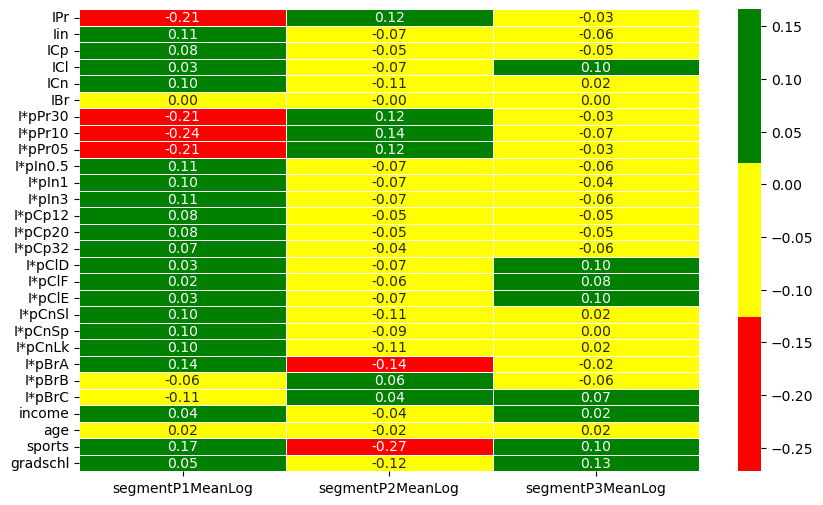

In [73]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmapData, annot=True, cmap=customCmap, linewidths=.5, fmt=".2f")

## Part (B) Classical segmentation

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
selectedCols = ["IPr","Iin","ICp", "ICl","ICn","IBr","I*pPr30","I*pPr10","I*pPr05","I*pIn0.5","I*pIn1","I*pIn3","I*pCp12","I*pCp20","I*pCp32","I*pClD","I*pClF","I*pClE","I*pCnSl","I*pCnSp","I*pCnLk","I*pBrA","I*pBrB","I*pBrC"]

In [76]:
mugsDataCSeg = mugsData[selectedCols]

In [77]:
mugsDataCSeg.head()

,IPr,Iin,ICp,ICl,ICn,IBr,I*pPr30,I*pPr10,I*pPr05,I*pIn0.5,...,I*pCp32,I*pClD,I*pClF,I*pClE,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC
0,5,8,32,7,34,14,5,15,35,8,...,192,7,14,49,34,170,238,98,70,14
1,6,3,17,10,51,15,6,36,42,3,...,102,10,60,70,51,357,357,105,75,15
2,55,5,5,8,16,9,55,330,385,5,...,5,8,24,56,16,80,112,9,27,63
3,12,9,3,40,20,16,12,72,84,9,...,9,40,200,280,20,100,140,112,16,80
4,56,6,19,9,0,11,56,224,392,6,...,38,9,27,63,0,0,0,33,11,77


In [78]:
kValues = list(range(2, 11))
inertiaValues = []
seedValue = 410014

In [79]:
for k in kValues:
    # Task 2: Set the number of runs to 50 and the maximum number of iterations to 100
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=100, random_state=seedValue)
    kmeans.fit(mugsDataCSeg)
    inertiaValues.append(kmeans.inertia_)

C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

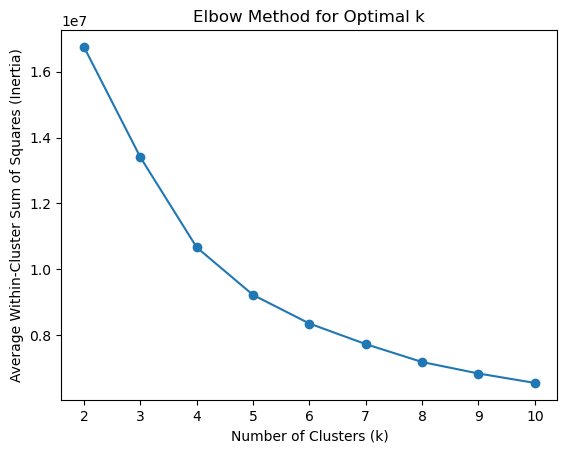

In [80]:
# Plotting the results
plt.plot(kValues, inertiaValues, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [81]:
# Calculate the differences in consecutive inertia values
diff_inertia = [inertiaValues[i] - inertiaValues[i - 1] for i in range(1, len(inertiaValues))]

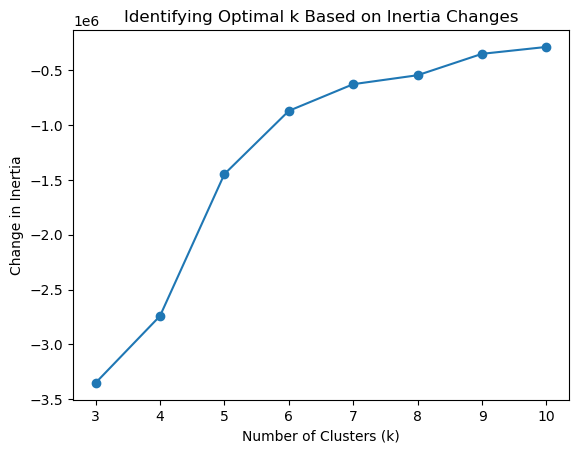

In [82]:
# Plotting the differences to identify the optimal k
plt.plot(range(3, 11), diff_inertia, marker='o')
plt.title('Identifying Optimal k Based on Inertia Changes')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Change in Inertia')
plt.show()

#### Machine Learning Approach with K=5

In [83]:
mugsDataMergedDFML = mugsDataMergedDF

In [84]:
# Optimal value of K is 5
K=5
# Assuming mugsDataMergedDF is your DataFrame
scaler = StandardScaler()
mugsDataMergedDFcaled = scaler.fit_transform(mugsDataMergedDFML)

In [85]:
kmeans = KMeans(n_clusters=K, n_init=50, max_iter=100, random_state=seedValue)
mugsDataMergedDFML['Cluster'] = kmeans.fit_predict(mugsDataMergedDFcaled)

C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [86]:
mugsDataMergedDFML.head(10)

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl,Cluster
0,1,1,3,7,1,3,7,1,7,6,...,170,238,98,70,14,63,46,0,0,4
1,2,1,6,7,1,4,7,1,7,6,...,357,357,105,75,15,65,48,0,0,4
2,3,1,6,7,1,4,7,7,4,1,...,80,112,9,27,63,38,37,0,0,0
3,4,1,6,7,1,4,7,7,1,3,...,100,140,112,16,80,77,58,1,1,1
4,5,1,4,7,1,4,7,1,7,2,...,0,0,33,11,77,44,41,0,0,0
5,6,1,5,7,1,4,7,1,7,7,...,78,91,45,15,105,79,60,1,1,1
6,7,1,7,7,1,6,7,1,7,7,...,38,133,36,84,12,40,37,0,0,2
7,8,1,6,7,1,2,7,1,7,2,...,24,56,50,70,10,43,39,0,0,2
8,9,1,5,7,1,3,7,1,5,7,...,186,217,91,52,13,59,44,0,0,4
9,10,1,7,7,1,3,7,6,7,1,...,60,105,45,105,15,46,41,0,0,2


In [87]:
# Exclude the "Cluster" column from the variables
variablesToAnalyze = [col for col in mugsDataMergedDFML.columns if col != "Cluster"]

In [88]:
# Calculate segment counts
segmentCounts = mugsDataMergedDFML['Cluster'].value_counts()

In [89]:
# Calculate overall population counts
totalCount = mugsDataMergedDFML.shape[0]

In [90]:
# Initialize an empty DataFrame to store log-lifts
logLiftsDF = pd.DataFrame(columns=variablesToAnalyze)

In [91]:
# Loop over each segment
for segment in mugsDataMergedDFML['Cluster'].unique():
    segmentData = mugsDataMergedDFML[mugsDataMergedDFML['Cluster'] == segment]

    # Calculate variable counts within the segment
    variableCounts = segmentData[variablesToAnalyze].apply(lambda col: col.value_counts())

    # Calculate log-lifts
    logLifts = np.log10((variableCounts / totalCount) / (segmentCounts[segment] / totalCount))

    # Add the log-lifts to the log_lifts_df
    logLiftsDF = pd.concat([logLiftsDF, logLifts])

In [92]:
logLiftsDF

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.159701,-0.128667
1,-1.591065,0.0,NaN,NaN,0.0,-0.989005,NaN,-0.176091,-0.812913,-0.549672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511883,-0.591065
2,-1.591065,NaN,-1.290035,NaN,NaN,-0.989005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.113943,NaN,NaN,-0.812913,NaN,-1.290035,-1.290035,-1.113943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.989005,NaN,NaN,-0.591065,NaN,-1.290035,-1.113943,-1.290035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Transpose the DataFrame for better readability
logLiftsDF = logLiftsDF.T

In [94]:
# Print or display the log-lifts DataFrame
print(logLiftsDF)

               0         1         2         3         4         5    \
Cust           NaN -1.591065 -1.591065       NaN       NaN       NaN   
pPr30          NaN  0.000000       NaN       NaN       NaN       NaN   
pPr10          NaN       NaN -1.290035 -1.113943 -0.989005 -0.636822   
pPr05          NaN       NaN       NaN       NaN       NaN       NaN   
pIn0.5         NaN  0.000000       NaN       NaN       NaN       NaN   
pIn1           NaN -0.989005 -0.989005 -0.812913 -0.591065 -0.892095   
pIn3           NaN       NaN       NaN       NaN       NaN       NaN   
pCp12          NaN -0.176091       NaN -1.290035 -1.290035 -0.892095   
pCp20          NaN -0.812913       NaN -1.290035 -1.113943 -1.290035   
pCp32          NaN -0.549672       NaN -1.113943 -1.290035 -1.290035   
pClD           NaN  0.000000       NaN       NaN       NaN       NaN   
pClF           NaN -1.113943 -1.290035 -1.591065 -0.745967 -0.444937   
pClE           NaN       NaN       NaN       NaN       NaN      

In [95]:
# Selecting relevant columns (excluding "Cust" and "Cluster")
colsToAnalyze = [col for col in mugsDataMergedDFML.columns if col not in ["Cust", "Cluster"]]

In [96]:
# Grouping by the "Cluster" column and calculating the mean for each group
clusterMeans = mugsDataMergedDFML.groupby("Cluster")[colsToAnalyze].mean()

In [97]:
# Computing the overall population average
populationAvg = mugsDataMergedDFML[colsToAnalyze].mean()

In [98]:
# Calculating log-lifts for each variable in each segment
logLifts = np.log10(clusterMeans / populationAvg)

In [99]:
# Displaying the log-lifts
print("Log-Lifts:")
print(logLifts)

Log-Lifts:
         pPr30     pPr10  pPr05  pIn0.5      pIn1  pIn3     pCp12     pCp20  \
Cluster                                                                       
0          0.0  0.011370    0.0     0.0  0.009572   0.0 -0.018617 -0.029856   
1          0.0  0.001776    0.0     0.0 -0.032544   0.0  0.012975  0.012492   
2          0.0  0.022945    0.0     0.0 -0.032544   0.0 -0.031417  0.005158   
3          0.0 -0.060223    0.0     0.0  0.049360   0.0  0.121208  0.019145   
4          0.0  0.001249    0.0     0.0  0.009186   0.0 -0.121490  0.013503   

            pCp32  pClD  ...   I*pCnSl   I*pCnSp   I*pCnLk    I*pBrA  \
Cluster                  ...                                           
0        0.030717   0.0  ... -0.199999 -0.206222 -0.199999 -0.239720   
1       -0.053175   0.0  ... -0.099523 -0.116270 -0.099523  0.053770   
2        0.019120   0.0  ... -0.083041 -0.139852 -0.083041 -0.201948   
3       -0.102113   0.0  ... -0.093640 -0.084140 -0.093640  0.227023   
4  

In [100]:
logLiftsTran = logLifts.T

In [101]:
logLiftsTran

Cluster,0,1,2,3,4
pPr30,0.000000,0.000000,0.000000,0.000000,0.000000
pPr10,0.011370,0.001776,0.022945,-0.060223,0.001249
pPr05,0.000000,0.000000,0.000000,0.000000,0.000000
pIn0.5,0.000000,0.000000,0.000000,0.000000,0.000000
pIn1,0.009572,-0.032544,-0.032544,0.049360,0.009186
pIn3,0.000000,0.000000,0.000000,0.000000,0.000000
pCp12,-0.018617,0.012975,-0.031417,0.121208,-0.121490
pCp20,-0.029856,0.012492,0.005158,0.019145,0.013503
pCp32,0.030717,-0.053175,0.019120,-0.102113,0.071763
pClD,0.000000,0.000000,0.000000,0.000000,0.000000


In [127]:
# Save the DataFrame to a CSV file
logLiftsTran.to_csv("logLifts5Upd.csv", index=True)

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
def plotAllColsByCluster(dataframe, clusteringCol):
    """
    Plot all columns (except clustering column) according to clusters.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - clustering_column: Name of the column used for clustering.

    Returns:
    - None (plots the data).
    """
    # Get all column names except the clustering column
    colsToPlot = [col for col in dataframe.columns if col != clusteringCol]

    # Loop through each column and plot
    for colName in colsToPlot:
        plotColumnByCluster(dataframe, colName, clusteringCol)

In [105]:
def plotColumnByCluster(dataframe, colName, clusteringCol):
    """
    Plot the specified column according to clusters.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column_name: Name of the column to be plotted.
    - clustering_column: Name of the column used for clustering.

    Returns:
    - None (plots the data).
    """
    # Check if the specified columns exist in the dataframe
    if colName not in dataframe.columns or clusteringCol not in dataframe.columns:
        print("Invalid column names. Please provide valid column names.")
        return
    
    # Set up the plot
    plt.figure(figsize=(6, 4))
    
    # Plot the data points colored by clusters
    sns.scatterplot(data=dataframe, x=colName, y=dataframe.index, hue=clusteringCol, palette="viridis", legend="full")
    
    # Customize the plot
    plt.title(f'{colName} by {clusteringCol}')
    plt.xlabel(colName)
    plt.ylabel('Data Points')
    plt.legend(title=clusteringCol)
    
    # Show the plot
    plt.show()

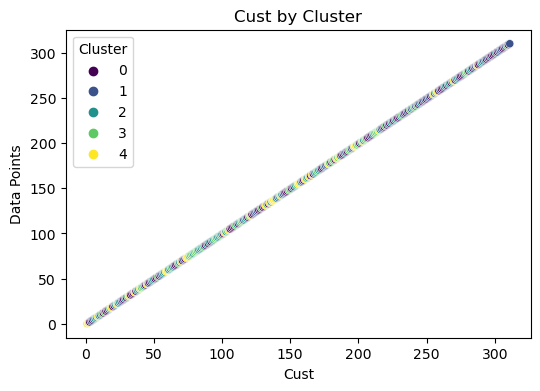

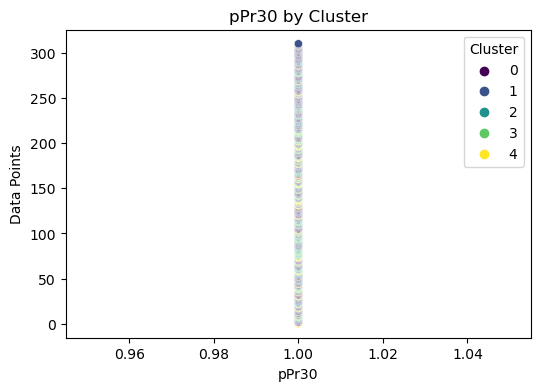

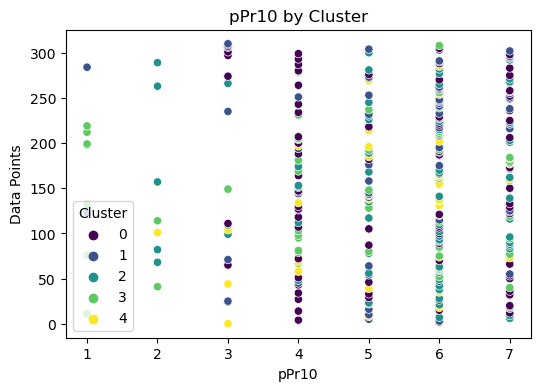

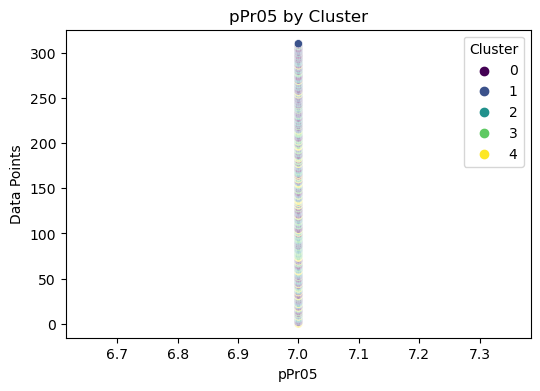

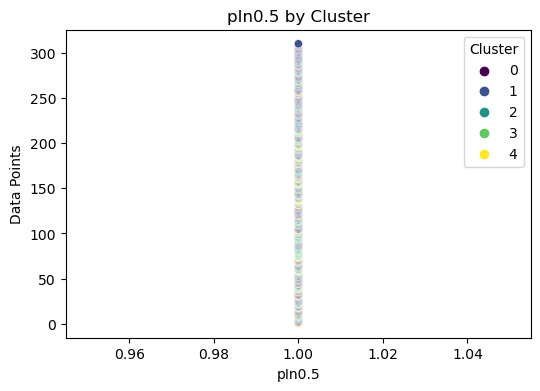

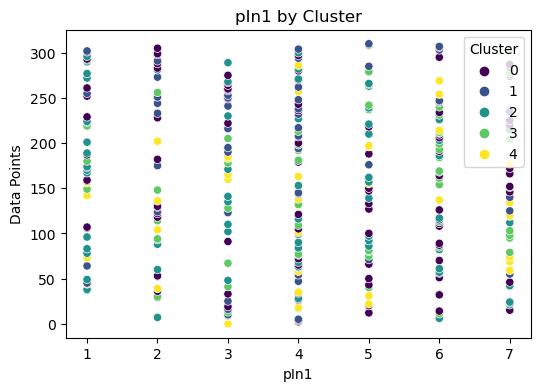

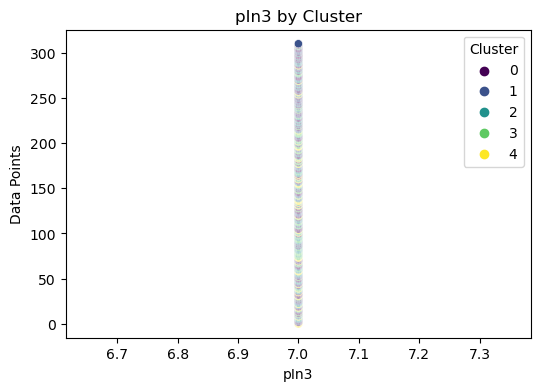

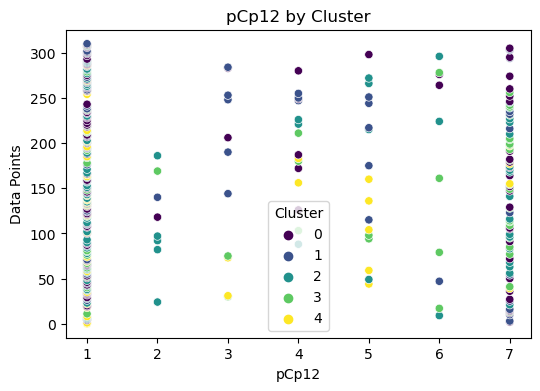

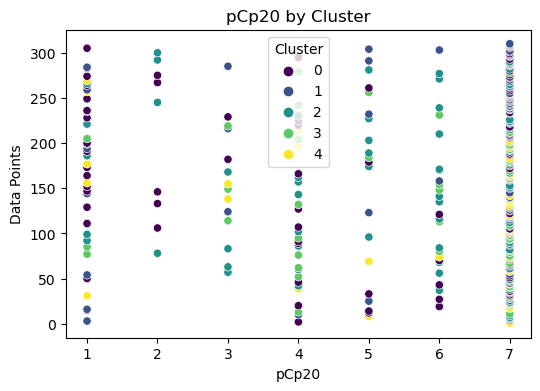

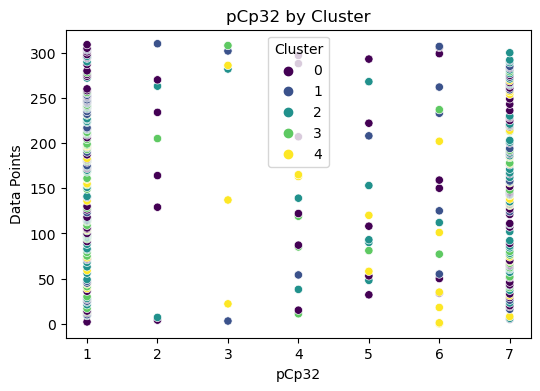

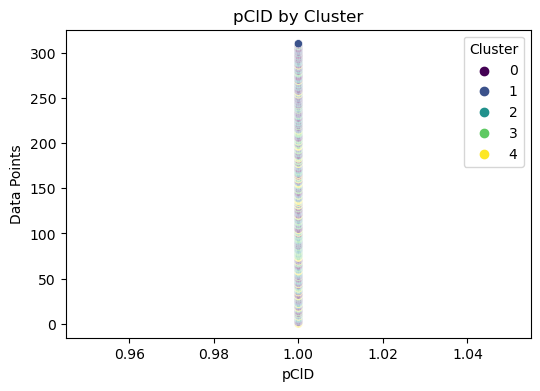

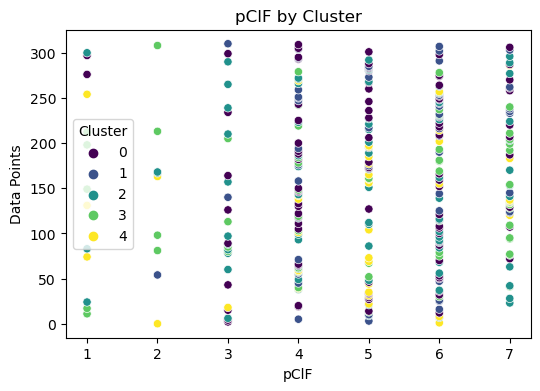

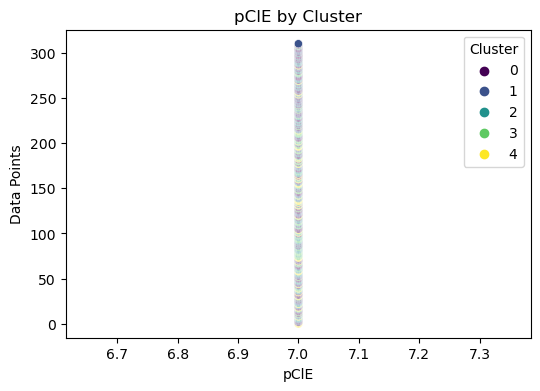

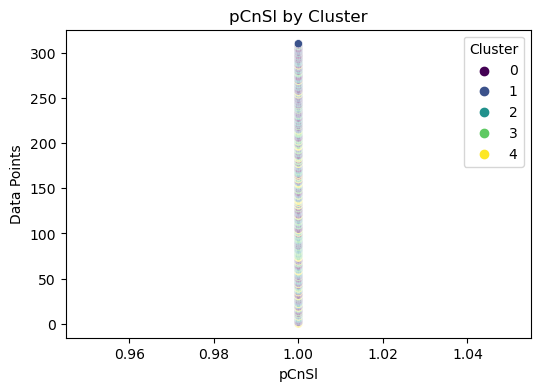

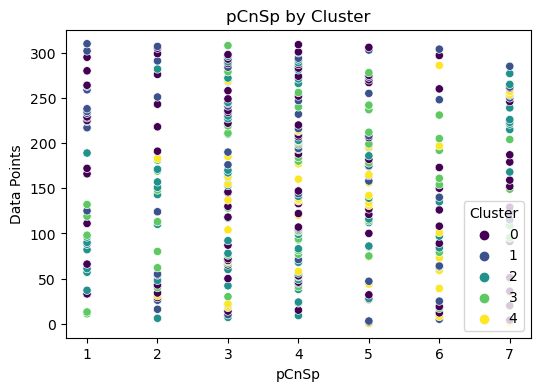

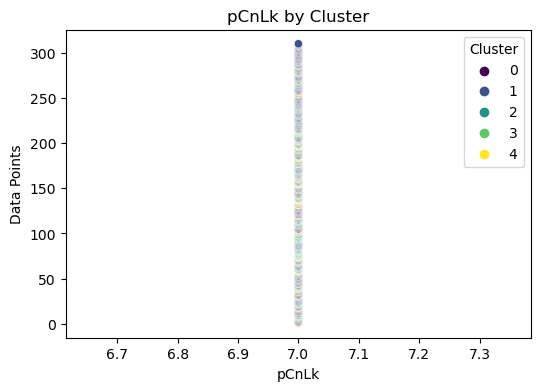

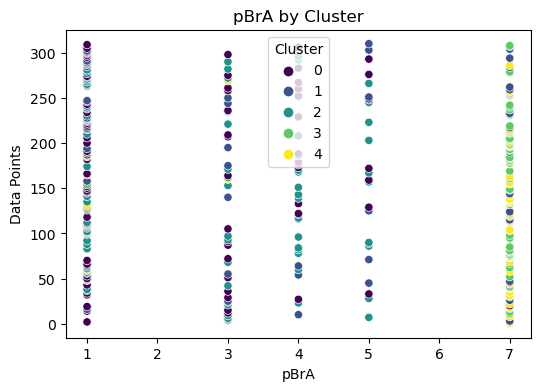

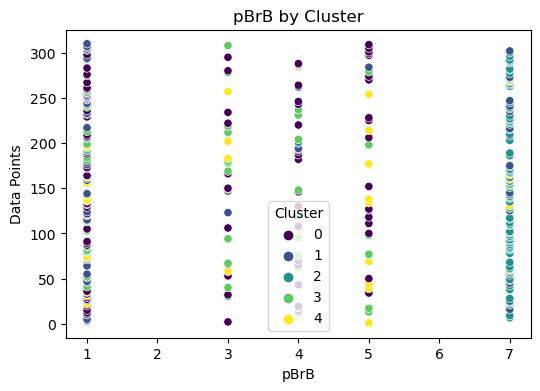

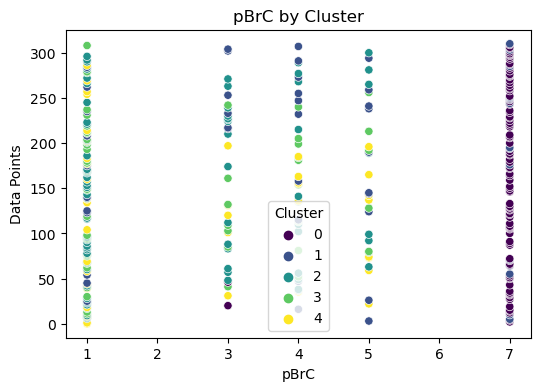

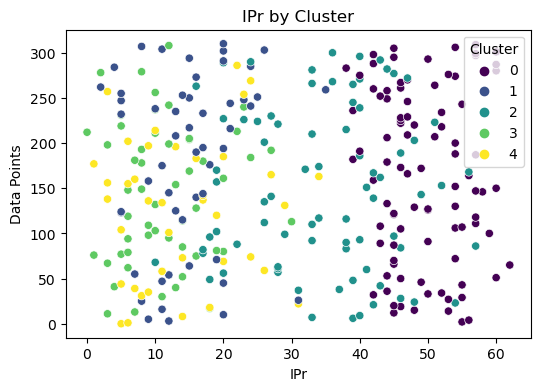

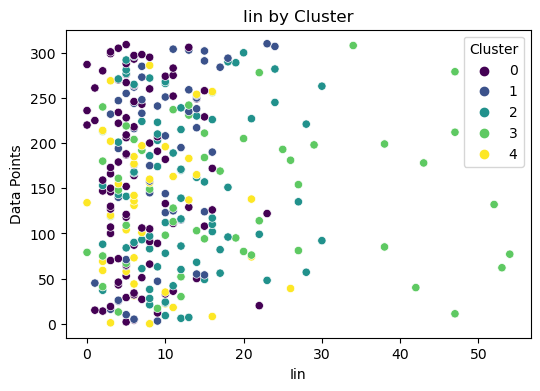

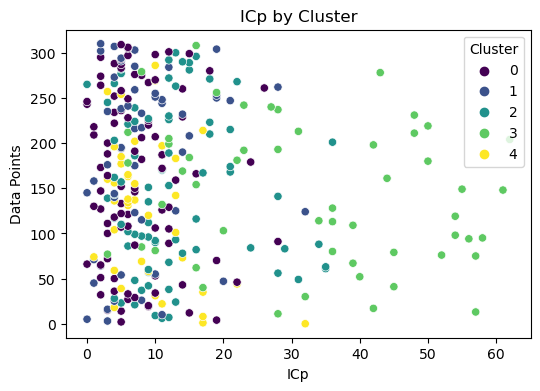

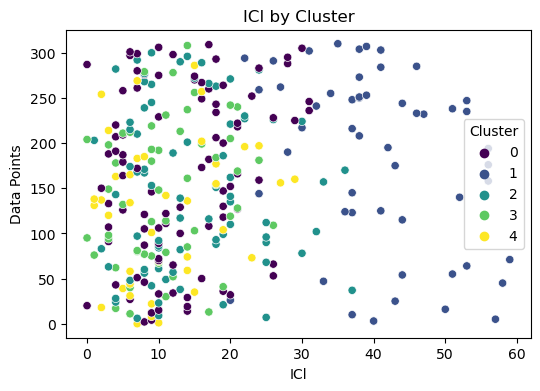

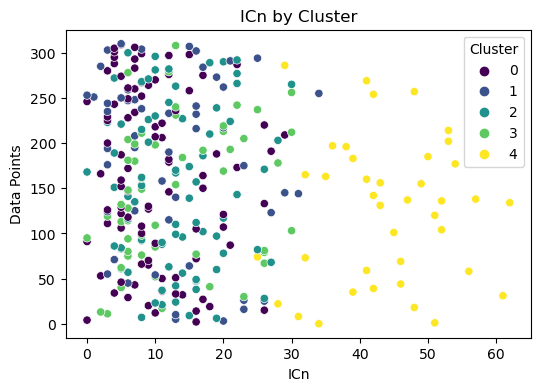

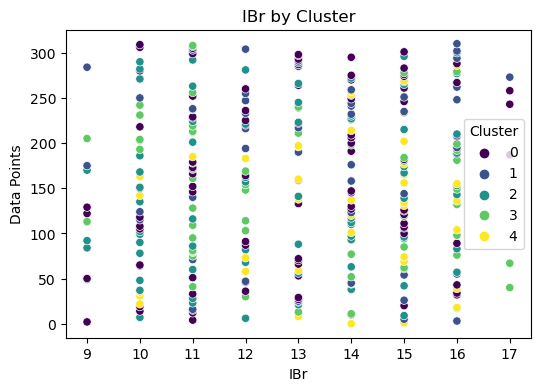

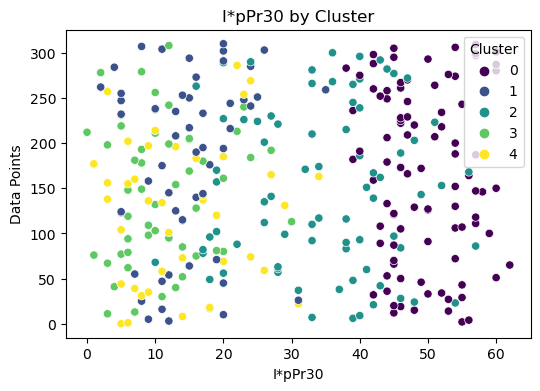

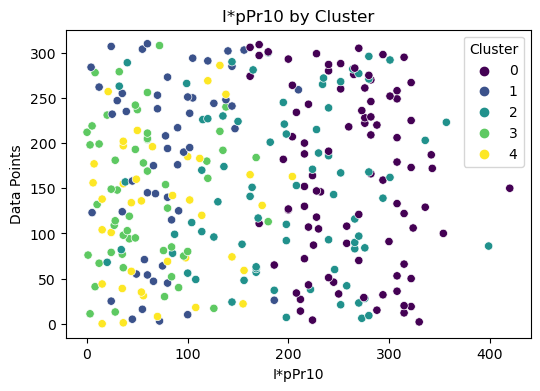

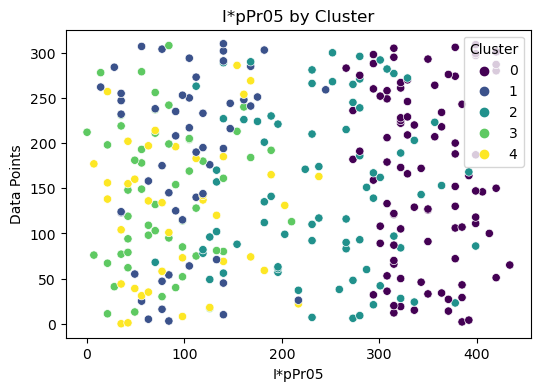

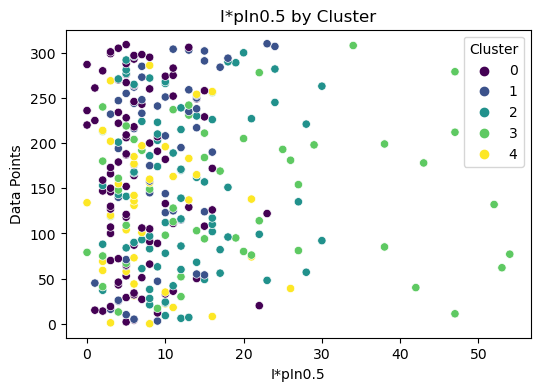

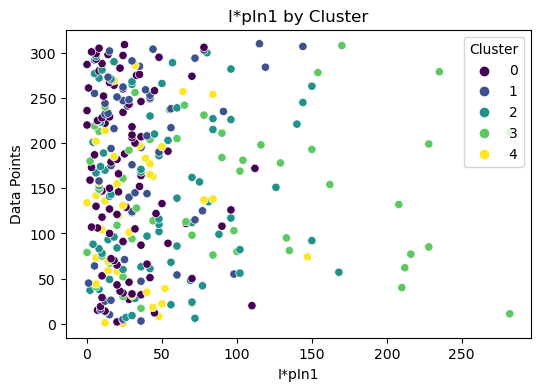

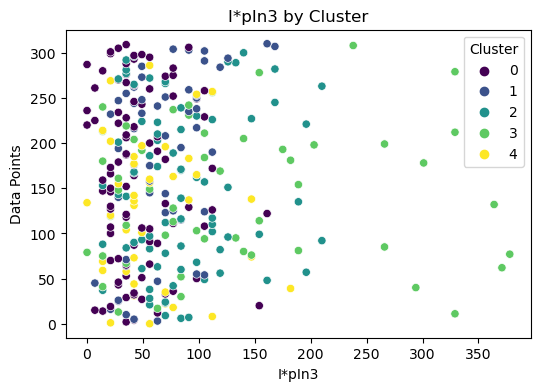

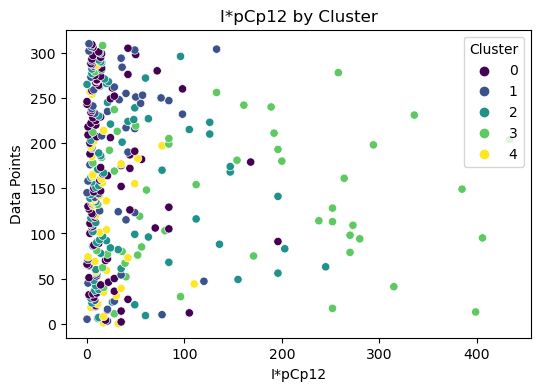

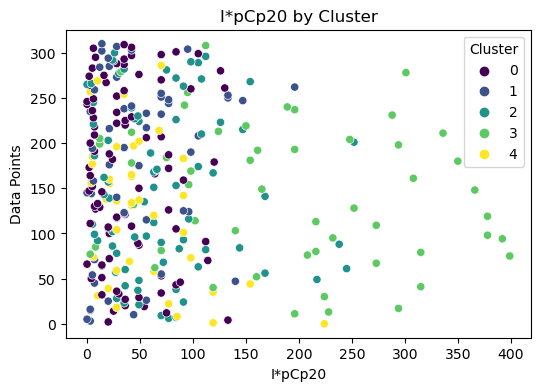

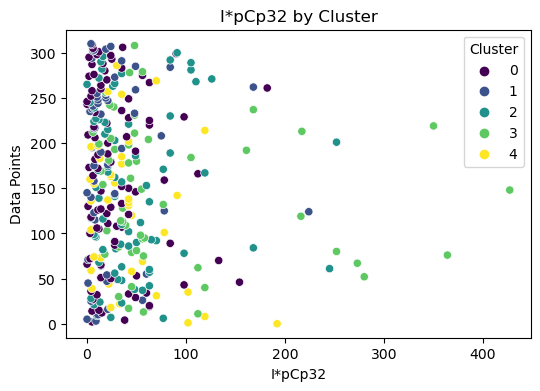

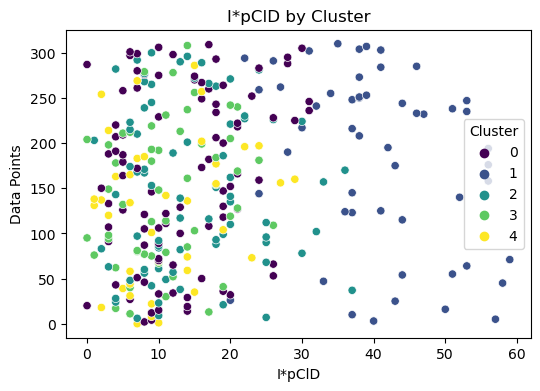

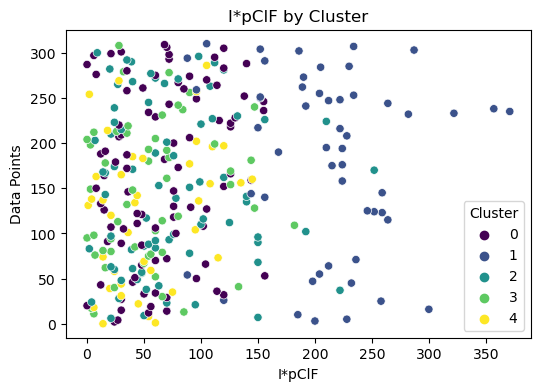

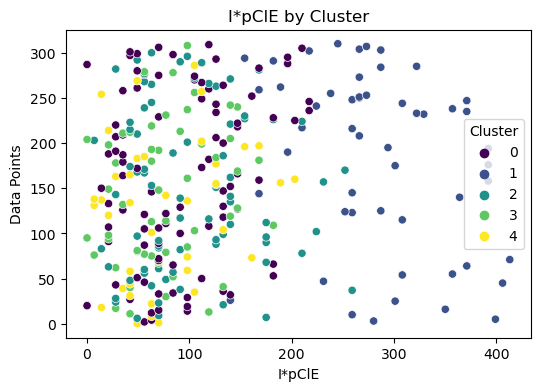

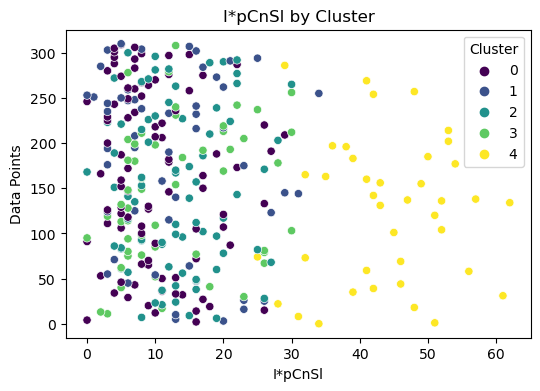

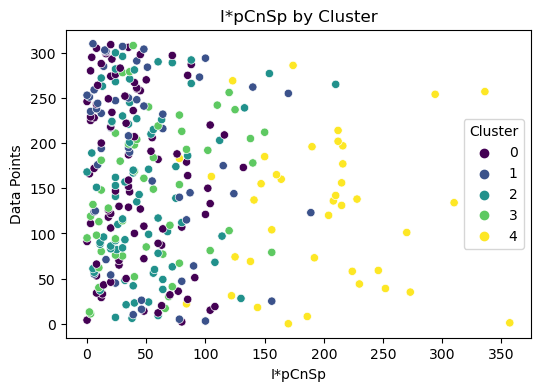

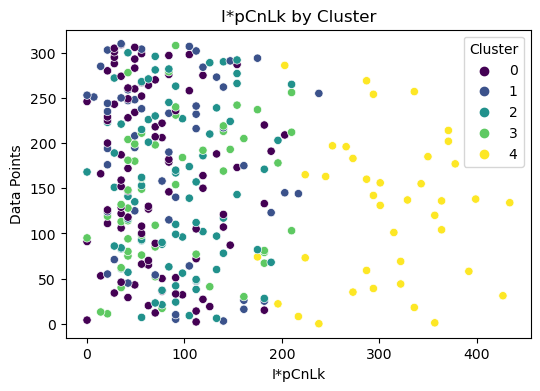

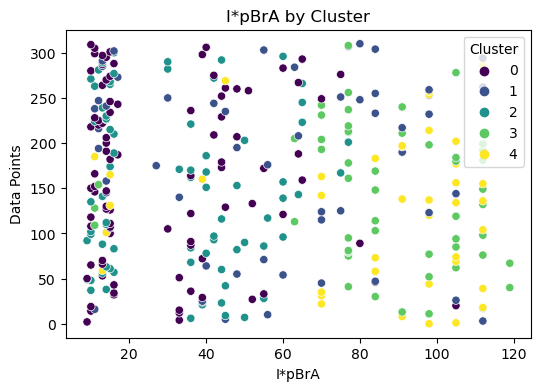

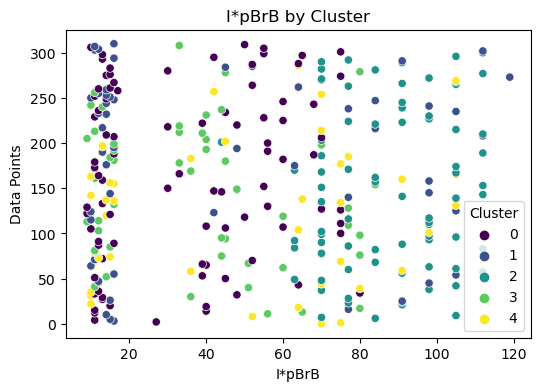

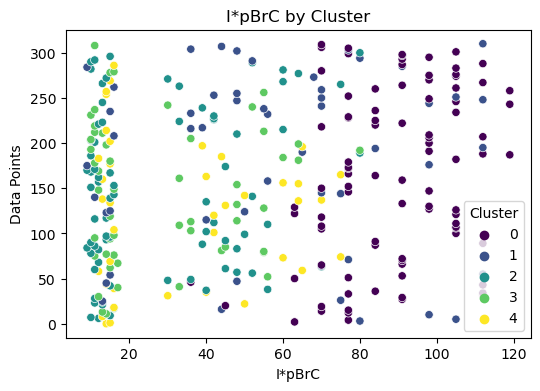

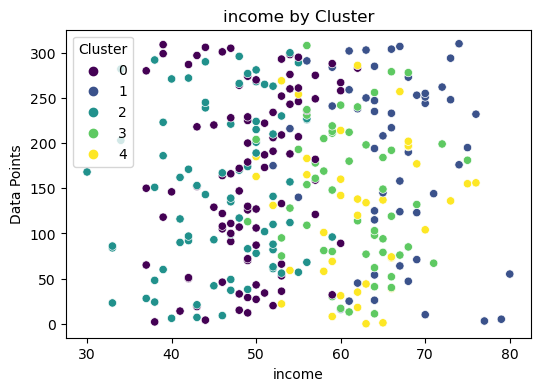

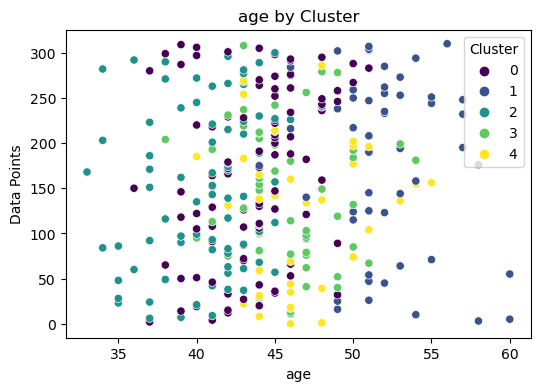

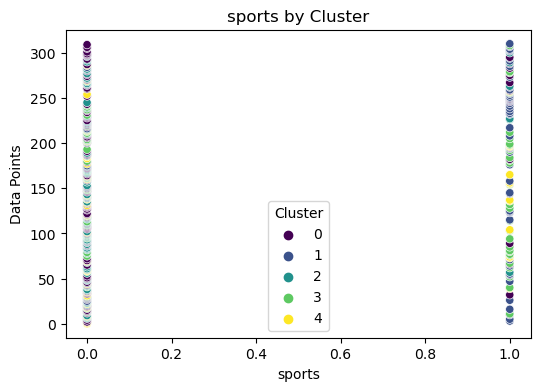

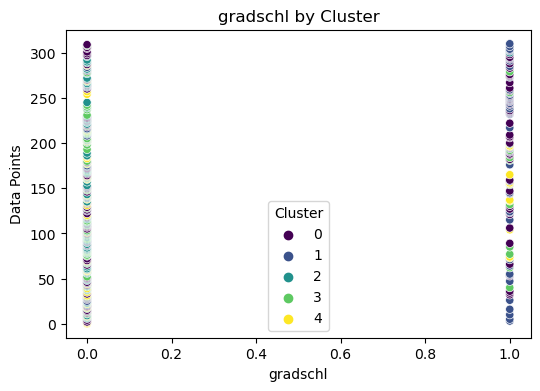

In [106]:
urClusteringCol = "Cluster"  # Example clustering column name
plotAllColsByCluster(mugsDataMergedDFML, urClusteringCol)

#### Marketing Approach with K=4

In [107]:
mugsDataMergedDFMar = mugsDataMergedDF

In [108]:
# Optimal value of K is 4
K=4
# Assuming mugsDataMergedDFMar is your DataFrame
scaler = StandardScaler()
mugsDataMergedDFMarkS = scaler.fit_transform(mugsDataMergedDFMar)

In [109]:
kmeans = KMeans(n_clusters=K, n_init=50, max_iter=100, random_state=seedValue)
mugsDataMergedDFMar['Cluster'] = kmeans.fit_predict(mugsDataMergedDFMarkS)

C:\Users\athorat\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [110]:
mugsDataMergedDFMar.head(10)

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl,Cluster
0,1,1,3,7,1,3,7,1,7,6,...,170,238,98,70,14,63,46,0,0,2
1,2,1,6,7,1,4,7,1,7,6,...,357,357,105,75,15,65,48,0,0,2
2,3,1,6,7,1,4,7,7,4,1,...,80,112,9,27,63,38,37,0,0,1
3,4,1,6,7,1,4,7,7,1,3,...,100,140,112,16,80,77,58,1,1,0
4,5,1,4,7,1,4,7,1,7,2,...,0,0,33,11,77,44,41,0,0,1
5,6,1,5,7,1,4,7,1,7,7,...,78,91,45,15,105,79,60,1,1,0
6,7,1,7,7,1,6,7,1,7,7,...,38,133,36,84,12,40,37,0,0,1
7,8,1,6,7,1,2,7,1,7,2,...,24,56,50,70,10,43,39,0,0,1
8,9,1,5,7,1,3,7,1,5,7,...,186,217,91,52,13,59,44,0,0,2
9,10,1,7,7,1,3,7,6,7,1,...,60,105,45,105,15,46,41,0,0,1


In [111]:
# Exclude the "Cluster" column from the variables
variablesToAnalyze = [col for col in mugsDataMergedDFMar.columns if col != "Cluster"]

In [112]:

# Calculate segment counts
segmentCountsMar = mugsDataMergedDFMar['Cluster'].value_counts()

In [113]:
# Calculate overall population counts
totalCountMar = mugsDataMergedDFMar.shape[0]

In [114]:
# Initialize an empty DataFrame to store log-lifts
logLiftsDFMar = pd.DataFrame(columns=variablesToAnalyze)

In [115]:
# Loop over each segment
for segment in mugsDataMergedDFMar['Cluster'].unique():
    segmentData = mugsDataMergedDFMar[mugsDataMergedDFMar['Cluster'] == segment]

    # Calculate variable counts within the segment
    variableCounts = segmentData[variablesToAnalyze].apply(lambda col: col.value_counts())

    # Calculate log-lifts
    logLifts = np.log10((variableCounts / totalCount) / (segmentCounts[segment] / totalCount))

    # Add the log-lifts to the log_lifts_df
    logLiftsDFMar = pd.concat([logLiftsDFMar, logLifts])

In [116]:
logLiftsDFMar

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,...,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.449450,-0.418416
1,-1.880814,-0.289749,NaN,NaN,-0.289749,-1.278754,NaN,-0.465840,-1.102662,-0.839421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.801632,-0.880814
2,-1.880814,NaN,-1.579784,NaN,NaN,-1.278754,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.403692,NaN,NaN,-1.102662,NaN,-1.579784,-1.579784,-1.403692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-1.278754,NaN,NaN,-0.880814,NaN,-1.579784,-1.403692,-1.579784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Transpose the DataFrame for better readability
logLiftsDFMar = logLiftsDFMar.T

# Print or display the log-lifts DataFrame
print(logLiftsDFMar)

               0         1         2         3         4         5    \
Cust           NaN -1.880814 -1.880814       NaN       NaN       NaN   
pPr30          NaN -0.289749       NaN       NaN       NaN       NaN   
pPr10          NaN       NaN -1.579784 -1.403692 -1.278754 -0.926571   
pPr05          NaN       NaN       NaN       NaN       NaN       NaN   
pIn0.5         NaN -0.289749       NaN       NaN       NaN       NaN   
pIn1           NaN -1.278754 -1.278754 -1.102662 -0.880814 -1.181844   
pIn3           NaN       NaN       NaN       NaN       NaN       NaN   
pCp12          NaN -0.465840       NaN -1.579784 -1.579784 -1.181844   
pCp20          NaN -1.102662       NaN -1.579784 -1.403692 -1.579784   
pCp32          NaN -0.839421       NaN -1.403692 -1.579784 -1.579784   
pClD           NaN -0.289749       NaN       NaN       NaN       NaN   
pClF           NaN -1.403692 -1.579784 -1.880814 -1.035716 -0.734686   
pClE           NaN       NaN       NaN       NaN       NaN      

In [119]:
# Selecting relevant columns (excluding "Cust" and "Cluster")
colsToAnalyze = [col for col in mugsDataMergedDFMar.columns if col not in ["Cust", "Cluster"]]

In [120]:
# Grouping by the "Cluster" column and calculating the mean for each group
clusterMeans = mugsDataMergedDFMar.groupby("Cluster")[colsToAnalyze].mean()

In [121]:
# Computing the overall population average
populationAvg = mugsDataMergedDFMar[colsToAnalyze].mean()

In [122]:
# Calculating log-lifts for each variable in each segment
logLiftsMar = np.log10(clusterMeans / populationAvg)

In [123]:
# Displaying the log-lifts
print("Log-Lifts:")
print(logLiftsMar.T)

Log-Lifts:
Cluster          0         1         2         3
pPr30     0.000000  0.000000  0.000000  0.000000
pPr10     0.005000  0.022714  0.001249 -0.069952
pPr05     0.000000  0.000000  0.000000  0.000000
pIn0.5    0.000000  0.000000  0.000000  0.000000
pIn1     -0.051461  0.000489  0.009186  0.040155
pIn3      0.000000  0.000000  0.000000  0.000000
pCp12     0.029629 -0.037404 -0.121490  0.112106
pCp20     0.001347 -0.016427  0.013503  0.029272
pCp32    -0.049019  0.034455  0.071763 -0.105725
pClD      0.000000  0.000000  0.000000  0.000000
pClF      0.028613 -0.005423 -0.015465 -0.006682
pClE      0.000000  0.000000  0.000000  0.000000
pCnSl     0.000000  0.000000  0.000000  0.000000
pCnSp    -0.024186 -0.004181  0.062564 -0.009455
pCnLk     0.000000  0.000000  0.000000  0.000000
pBrA      0.020695 -0.209687  0.184628  0.195847
pBrB     -0.022600  0.045635 -0.044603 -0.077713
pBrC      0.007411  0.098408 -0.197140 -0.236847
IPr      -0.261489  0.190217 -0.319738 -0.381487
Iin      

In [124]:
logLiftsMarTran = logLiftsMar.T

In [126]:
# Save the DataFrame to a CSV file
logLiftsMarTran.to_csv("logLifts4Upd.csv", index=True)